In [99]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [100]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [101]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [102]:
# Customer segmentation based on age
age_bins = [0, 20, 30, 40, 50, float('inf')]
age_labels = ['<20', '20-30', '30-40', '40-50', '50+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Age_Group
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes,<20
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes,20-30
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes,20-30
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes,20-30
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes,20-30


In [103]:
order_count = df['Output'].value_counts()
order_count

Output
Yes    301
No      87
Name: count, dtype: int64

In [104]:
feedback_sentiment = df['Feedback'].value_counts()
feedback_sentiment


Feedback
Positive     317
Negative      71
Name: count, dtype: int64

In [105]:
gender_distribution = df['Gender'].value_counts(normalize=True)
gender_distribution


Gender
Male      0.572165
Female    0.427835
Name: proportion, dtype: float64

In [106]:
marital_status_distribution = df['Marital Status'].value_counts(normalize=True)
marital_status_distribution


Marital Status
Single               0.690722
Married              0.278351
Prefer not to say    0.030928
Name: proportion, dtype: float64

In [107]:
occupation_distribution = df['Occupation'].value_counts(normalize=True)
occupation_distribution

Occupation
Student           0.533505
Employee          0.304124
Self Employeed    0.139175
House wife        0.023196
Name: proportion, dtype: float64

In [108]:
edu_qual_distribution = df['Educational Qualifications'].value_counts(normalize=True)
edu_qual_distribution

Educational Qualifications
Graduate         0.456186
Post Graduate    0.448454
Ph.D             0.059278
School           0.030928
Uneducated       0.005155
Name: proportion, dtype: float64

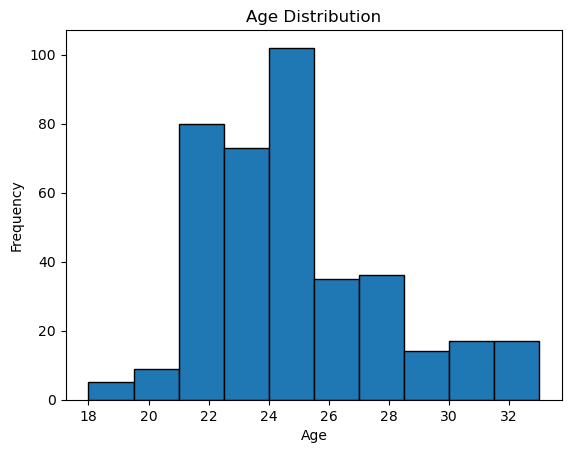

In [109]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


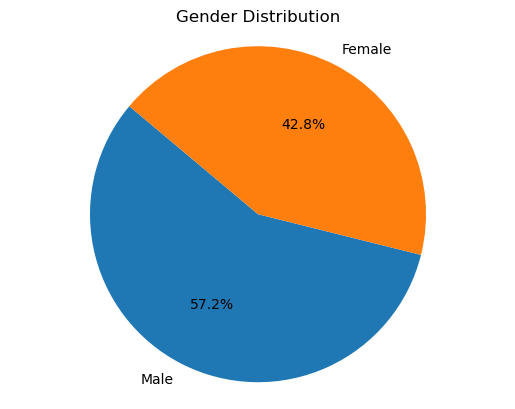

In [110]:
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()


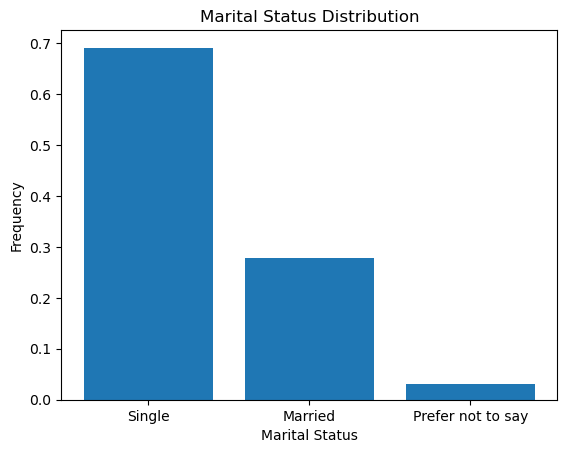

In [111]:
plt.bar(marital_status_distribution.index, marital_status_distribution.values)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital Status Distribution')
plt.show()


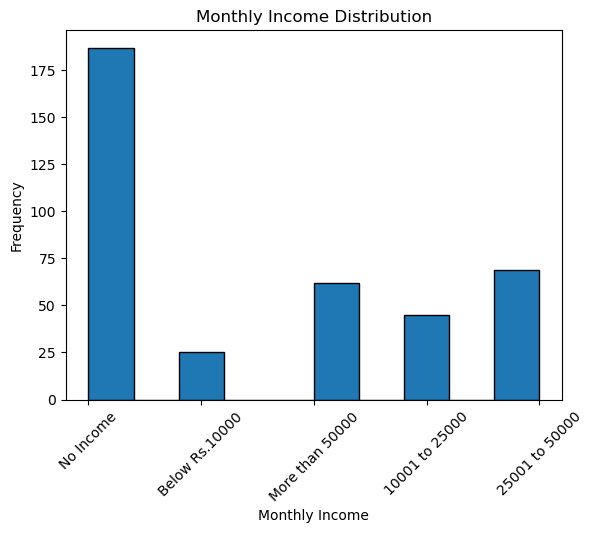

In [112]:
plt.hist(df['Monthly Income'], bins=10, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Monthly Income Distribution')
plt.show()

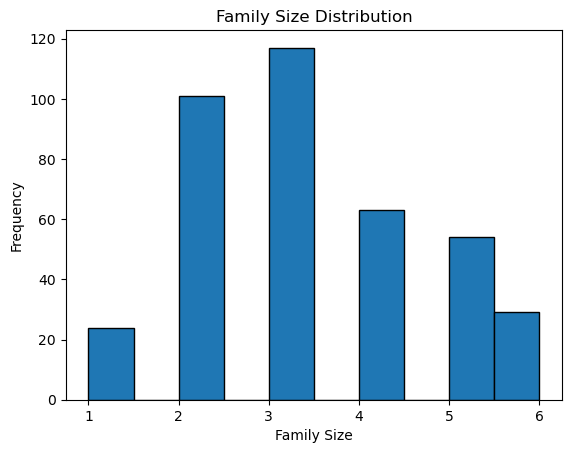

In [113]:
plt.hist(df['Family size'], bins=10, edgecolor='black')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.title('Family Size Distribution')
plt.show()

In [114]:
import folium

map_center = [df['latitude'].mean(), df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each data point
for idx, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Pin code: {row['Pin code']}").add_to(mymap)

mymap